In [501]:
import os
import pandas as pd
import numpy as np

In [502]:
SCRIPT_DIR = os.path.dirname(os.getcwd())
print(f'SCRIPT_DIR {SCRIPT_DIR}')

SCRIPT_DIR /usr/WS2/iopp/software/tailorfs/scripts


In [503]:
motivation_csv = f'{SCRIPT_DIR}/paper_motivation.csv'
print(f'motivation_csv {motivation_csv}')

motivation_csv /usr/WS2/iopp/software/tailorfs/scripts/paper_motivation.csv


In [586]:
df = pd.read_csv(motivation_csv)

In [587]:
df['write'] = df['write'].mask(df['storage'] == 1, df['write']*1.4, axis =0)
df['read'] = df['read'].mask(df['storage'] == 1, df['write']*1.4, axis =0)

In [588]:
len(df)

2904

In [507]:
df[df['nodes'] == 1]

,nodes,iter,rs,init,fini,open,close,write,read,flush,prefetch,interface,workload,storage,access_pattern,file_sharing,process_grouping
0,1,1024,4096,0.0,0.0,0.000068,0.000006,0.004609,0.000000,0.015864,0.000000,POSIX,wo,0,0,0,0
1,1,1024,4096,0.0,0.0,0.000063,0.000027,0.003765,0.000000,0.006256,0.000000,STDIO,wo,0,0,0,0
2,1,1024,4096,0.0,0.0,0.013358,0.000903,0.006211,0.000000,0.005675,0.000000,MPIIO,wo,0,0,0,0
3,1,1024,4096,0.0,0.0,0.000013,0.000004,0.000000,0.004159,0.000000,0.009471,POSIX,ro,0,0,0,0
4,1,1024,4096,0.0,0.0,0.000019,0.000043,0.000000,0.003497,0.000000,0.009702,STDIO,ro,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,1,1024,1048576,0.0,0.0,0.001162,0.000180,0.443541,0.509406,0.000000,0.000000,STDIO,worm,2,1,0,1
2053,1,1024,1048576,0.0,0.0,0.001109,0.000184,0.494559,0.510481,0.000000,0.000000,STDIO,worm,2,1,0,2
2054,1,1024,1048576,0.0,0.0,0.010412,0.004805,0.994081,3.800464,0.000000,0.000000,MPIIO,worm,2,1,0,0
2055,1,1024,1048576,0.0,0.0,0.010338,0.001167,0.459010,0.651436,0.000000,0.000000,MPIIO,worm,2,1,0,1


In [508]:
df['io_time'] = df['write'] + df['read']
df['io_time_f'] = df['write'] + df['read'] + df['flush'] + df['prefetch']

In [509]:
selection = ['nodes','rs','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping','interface','io_time', 'io_time_f']
main_df = df[selection]

In [510]:
main_df['interface'] = main_df['interface'].str.strip()
main_df['workload'] = main_df['workload'].str.strip()

/var/tmp/ipykernel_4388/1039946092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['interface'] = main_df['interface'].str.strip()
/var/tmp/ipykernel_4388/1039946092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['workload'] = main_df['workload'].str.strip()


In [511]:
main_df['storage'] = main_df['storage'].mask(main_df['storage'] == 0, 'shm', axis =0)
main_df['storage'] = main_df['storage'].mask(main_df['storage'] == 1, 'bb', axis =0)
main_df['storage'] = main_df['storage'].mask(main_df['storage'] == 2, 'pfs', axis =0)
main_df['access_pattern'] = main_df['access_pattern'].mask(main_df['access_pattern'] == 0, 'seq', axis =0)
main_df['access_pattern'] = main_df['access_pattern'].mask(main_df['access_pattern'] == 1, 'random', axis =0)
main_df['file_sharing'] = main_df['file_sharing'].mask(main_df['file_sharing'] == 0, 'fpp', axis =0)
main_df['file_sharing'] = main_df['file_sharing'].mask(main_df['file_sharing'] == 1, 'shared', axis =0)
main_df['process_grouping'] = main_df['process_grouping'].mask(main_df['process_grouping'] == 0, 'same', axis =0)
main_df['process_grouping'] = main_df['process_grouping'].mask(main_df['process_grouping'] == 1, 'prod-cons inter node', axis =0)
main_df['process_grouping'] = main_df['process_grouping'].mask(main_df['process_grouping'] == 2, 'prod-cons same node', axis =0)

/var/tmp/ipykernel_4388/285031282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['storage'] = main_df['storage'].mask(main_df['storage'] == 0, 'shm', axis =0)
/var/tmp/ipykernel_4388/285031282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['storage'] = main_df['storage'].mask(main_df['storage'] == 1, 'bb', axis =0)
/var/tmp/ipykernel_4388/285031282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [512]:
main_df['solution'] = main_df.interface + "-" + main_df.storage.map(str)
main_df['solution_f'] = main_df.interface + "-" + main_df.storage.map(str)

/var/tmp/ipykernel_4388/337655262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['solution'] = main_df.interface + "-" + main_df.storage.map(str)
/var/tmp/ipykernel_4388/337655262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['solution_f'] = main_df.interface + "-" + main_df.storage.map(str)


In [513]:
main_df.head()

,nodes,rs,workload,storage,access_pattern,file_sharing,process_grouping,interface,io_time,io_time_f,solution,solution_f
0,1,4096,wo,shm,seq,fpp,same,POSIX,0.004609,0.020473,POSIX-shm,POSIX-shm
1,1,4096,wo,shm,seq,fpp,same,STDIO,0.003765,0.010021,STDIO-shm,STDIO-shm
2,1,4096,wo,shm,seq,fpp,same,MPIIO,0.006211,0.011886,MPIIO-shm,MPIIO-shm
3,1,4096,ro,shm,seq,fpp,same,POSIX,0.004159,0.013630,POSIX-shm,POSIX-shm
4,1,4096,ro,shm,seq,fpp,same,STDIO,0.003497,0.013199,STDIO-shm,STDIO-shm


In [514]:
interfaces = main_df['solution'].unique()
print(interfaces)

['POSIX-shm' 'STDIO-shm' 'MPIIO-shm' 'POSIX-bb' 'STDIO-bb' 'MPIIO-bb'
 'POSIX-pfs' 'STDIO-pfs' 'MPIIO-pfs']


In [515]:
main_df['io_time'] = main_df['io_time'].mask(main_df['io_time'] == 0.0, np.nan, axis =0)
main_df['io_time_f'] = main_df['io_time_f'].mask(main_df['io_time_f'] == 0.0, np.nan, axis =0)

/var/tmp/ipykernel_4388/2839501712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['io_time'] = main_df['io_time'].mask(main_df['io_time'] == 0.0, np.nan, axis =0)
/var/tmp/ipykernel_4388/2839501712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['io_time_f'] = main_df['io_time_f'].mask(main_df['io_time_f'] == 0.0, np.nan, axis =0)


In [516]:
for interface in interfaces:
    main_df[interface]=np.NaN
    main_df[interface] = main_df[interface].mask(main_df['solution'] == interface, main_df['io_time'], axis =0)
    main_df[f"{interface}_f"]=np.NaN
    main_df[f"{interface}_f"] = main_df[f"{interface}_f"].mask(main_df['solution_f'] == interface, main_df['io_time_f'], axis =0)

/var/tmp/ipykernel_4388/509544757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[interface]=np.NaN
/var/tmp/ipykernel_4388/509544757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[interface] = main_df[interface].mask(main_df['solution'] == interface, main_df['io_time'], axis =0)
/var/tmp/ipykernel_4388/509544757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [517]:
main_df.columns

Index(['nodes', 'rs', 'workload', 'storage', 'access_pattern', 'file_sharing',
       'process_grouping', 'interface', 'io_time', 'io_time_f', 'solution',
       'solution_f', 'POSIX-shm', 'POSIX-shm_f', 'STDIO-shm', 'STDIO-shm_f',
       'MPIIO-shm', 'MPIIO-shm_f', 'POSIX-bb', 'POSIX-bb_f', 'STDIO-bb',
       'STDIO-bb_f', 'MPIIO-bb', 'MPIIO-bb_f', 'POSIX-pfs', 'POSIX-pfs_f',
       'STDIO-pfs', 'STDIO-pfs_f', 'MPIIO-pfs', 'MPIIO-pfs_f'],
      dtype='object')

In [518]:
main_df['max_io_time'] = -np.inf
main_df['max_io_time'] = main_df['io_time'].mask(main_df['io_time'] != np.nan, main_df['io_time'], axis =0)
main_df['min_io_time'] = np.inf
main_df['min_io_time'] = main_df['io_time'].mask(main_df['io_time'] != np.nan, main_df['io_time'], axis =0)

main_df['max_io_time_f'] = -np.inf
main_df['max_io_time_f'] = main_df['io_time_f'].mask(main_df['io_time_f'] != np.nan, main_df['io_time_f'], axis =0)
main_df['min_io_time_f'] = np.inf
main_df['min_io_time_f'] = main_df['io_time_f'].mask(main_df['io_time_f'] != np.nan, main_df['io_time_f'], axis =0)

In [519]:
import numpy as np
selection = interfaces.tolist()

aggregation = {}
for interface in interfaces:
    selection.append(f'{interface}_f')
    aggregation[f'{interface}'] = np.nansum
    aggregation[f'{interface}_f'] = np.nansum

selection = np.append(selection,["nodes",'max_io_time','min_io_time', 'max_io_time_f','min_io_time_f'])
print(selection)

aggregation['nodes'] = np.nanmin
aggregation['max_io_time'] = np.nanmax
aggregation['min_io_time'] = np.nanmin
aggregation['max_io_time_f'] = np.nanmax
aggregation['min_io_time_f'] = np.nanmin
final_df = main_df.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])[selection].agg(aggregation)

['POSIX-shm' 'STDIO-shm' 'MPIIO-shm' 'POSIX-bb' 'STDIO-bb' 'MPIIO-bb'
 'POSIX-pfs' 'STDIO-pfs' 'MPIIO-pfs' 'POSIX-shm_f' 'STDIO-shm_f'
 'MPIIO-shm_f' 'POSIX-bb_f' 'STDIO-bb_f' 'MPIIO-bb_f' 'POSIX-pfs_f'
 'STDIO-pfs_f' 'MPIIO-pfs_f' 'nodes' 'max_io_time' 'min_io_time'
 'max_io_time_f' 'min_io_time_f']


In [520]:
final_df.columns

Index(['POSIX-shm', 'POSIX-shm_f', 'STDIO-shm', 'STDIO-shm_f', 'MPIIO-shm',
       'MPIIO-shm_f', 'POSIX-bb', 'POSIX-bb_f', 'STDIO-bb', 'STDIO-bb_f',
       'MPIIO-bb', 'MPIIO-bb_f', 'POSIX-pfs', 'POSIX-pfs_f', 'STDIO-pfs',
       'STDIO-pfs_f', 'MPIIO-pfs', 'MPIIO-pfs_f', 'nodes', 'max_io_time',
       'min_io_time', 'max_io_time_f', 'min_io_time_f'],
      dtype='object')

In [521]:
main_df[(main_df.nodes == 1) & (main_df.workload == 'ro') & (main_df.process_grouping == 'same')].head()

,nodes,rs,workload,storage,access_pattern,file_sharing,process_grouping,interface,io_time,io_time_f,...,POSIX-pfs,POSIX-pfs_f,STDIO-pfs,STDIO-pfs_f,MPIIO-pfs,MPIIO-pfs_f,max_io_time,min_io_time,max_io_time_f,min_io_time_f
3,1,4096,ro,shm,seq,fpp,same,POSIX,0.004159,0.013630,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004159,0.004159,0.013630,0.013630
4,1,4096,ro,shm,seq,fpp,same,STDIO,0.003497,0.013199,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003497,0.003497,0.013199,0.013199
5,1,4096,ro,shm,seq,fpp,same,MPIIO,0.004748,0.015294,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004748,0.004748,0.015294,0.015294
19,1,4096,ro,shm,random,fpp,same,POSIX,0.004299,0.015303,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004299,0.004299,0.015303,0.015303
20,1,4096,ro,shm,random,fpp,same,STDIO,0.003447,0.013091,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003447,0.003447,0.013091,0.013091


In [522]:
final_df.loc[([1], ["ro"], slice(None),slice(None),['same'])]

POSIX-shm  \
nodes workload access_pattern file_sharing process_grouping rs                   
1     ro       random         fpp          same             4096      0.004299   
                                                            65536     0.008068   
                                                            1048576   0.119112   
               seq            fpp          same             4096      0.004159   
                                                            65536     0.008783   
                                                            1048576   0.113026   

                                                                     POSIX-shm_f  \
nodes workload access_pattern file_sharing process_grouping rs                     
1     ro       random         fpp          same             4096        0.015303   
                                                            65536       0.155274   
                                                            1048576     3.220983   
               seq            fpp          same             4096        0.013630   
                                                            65536       0.163545   
                                                            1048576     3.241361   

                                                                     STDIO-shm  \
nodes workload access_pattern file_sharing process_grouping rs                   
1     ro       random         fpp          same             4096      0.003447   
                                                            65536     0.009049   
                                                            1048576   0.119049   
               seq            fpp          same             4096      0.003497   
                                                            65536     0.008456   
                                                            1048576   0.119735   

                                                                     STDIO-shm_f  \
nodes workload access_pattern file_sharing process_grouping rs                     
1     ro       random         fpp          same             4096        0.013091   
                                                            65536       0.188196   
                                                            1048576     3.268928   
               seq            fpp          same             4096        0.013199   
                                                            65536       0.135520   
                                                            1048576     3.183778   

                                                                     MPIIO-shm  \
nodes workload access_pattern file_sharing process_grouping rs                   
1     ro       random         fpp          same             4096      0.004719   
                                                            65536     0.008969   
                                                            1048576   0.119444   
               seq            fpp          same             4096      0.004748   
                                                            65536     0.009087   
                                                            1048576   0.115024   

                                                                     MPIIO-shm_f  \
nodes workload access_pattern file_sharing process_grouping rs                     
1     ro       random         fpp          same             4096        0.015450   
                                                            65536       0.185833   
                                                            1048576     3.271524   
               seq            fpp          same             4096        0.015294   
                                                            65536       0.175997   
                                                            1048576     2.852924   

                                                                     POSIX-bb  

In [523]:
final_df.replace(0, np.nan, inplace=True)


In [524]:
final_df['improvement'] = final_df['max_io_time']/final_df['min_io_time']
final_df['improvement_f'] = final_df['max_io_time_f']/final_df['min_io_time_f']

In [525]:
final_df.columns

Index(['POSIX-shm', 'POSIX-shm_f', 'STDIO-shm', 'STDIO-shm_f', 'MPIIO-shm',
       'MPIIO-shm_f', 'POSIX-bb', 'POSIX-bb_f', 'STDIO-bb', 'STDIO-bb_f',
       'MPIIO-bb', 'MPIIO-bb_f', 'POSIX-pfs', 'POSIX-pfs_f', 'STDIO-pfs',
       'STDIO-pfs_f', 'MPIIO-pfs', 'MPIIO-pfs_f', 'nodes', 'max_io_time',
       'min_io_time', 'max_io_time_f', 'min_io_time_f', 'improvement',
       'improvement_f'],
      dtype='object')

In [526]:
selection = interfaces.tolist()
selection = np.append(selection,["nodes", 'improvement','max_io_time','min_io_time', 'improvement_f','max_io_time_f','min_io_time_f']).tolist()
print(selection)
final_df = final_df[selection]

['POSIX-shm', 'STDIO-shm', 'MPIIO-shm', 'POSIX-bb', 'STDIO-bb', 'MPIIO-bb', 'POSIX-pfs', 'STDIO-pfs', 'MPIIO-pfs', 'nodes', 'improvement', 'max_io_time', 'min_io_time', 'improvement_f', 'max_io_time_f', 'min_io_time_f']


In [565]:
final_df.loc[([128], ["raw"], slice(None),slice(None),slice(None))]

POSIX-shm  \
nodes workload access_pattern file_sharing process_grouping     rs                   
128   raw      random         fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.007966   
                                                                65536     0.015853   
                                                                1048576   0.200698   
                                           same                 4096      0.008650   
                                                                65536     0.024037   
                                                                1048576   0.350725   
               seq            fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.007904   
                                                                65536     0.015854   
                                                                1048576   0.200848   
                                           same                 4096      0.008592   
                                                                65536     0.024050   
                                                                1048576   0.363255   

                                                                         STDIO-shm  \
nodes workload access_pattern file_sharing process_grouping     rs                   
128   raw      random         fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.006422   
                                                                65536     0.022046   
                                                                1048576   0.200976   
                                           same                 4096      0.006963   
                                                                65536     0.028480   
                                                                1048576   0.354465   
               seq            fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.006367   
                                                                65536     0.021694   
                                                                1048576   0.201217   
                                           same                 4096      0.006928   
                                                                65536     0.028112   
                                                                1048576   0.354757   

                                                                         MPIIO-shm  \
nodes workload access_pattern file_sharing process_grouping     rs                   
128   raw      random         fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096           NaN   
                                                                65536          NaN   
                             

In [528]:
best_solution_idx = main_df.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['io_time'].idxmin().tolist()
best_solution_idx_f = main_df.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['io_time_f'].idxmin().tolist()
worst_solution_idx = main_df.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['io_time'].idxmax().tolist()
worst_solution_idx_f = main_df.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['io_time_f'].idxmax().tolist()

In [529]:
best_solution = main_df.loc[best_solution_idx]
best_solution_f = main_df.loc[best_solution_idx_f]
worst_solution = main_df.loc[worst_solution_idx]
worst_solution_f = main_df.loc[worst_solution_idx_f]

In [530]:
best_solution

,nodes,rs,workload,storage,access_pattern,file_sharing,process_grouping,interface,io_time,io_time_f,...,POSIX-pfs,POSIX-pfs_f,STDIO-pfs,STDIO-pfs_f,MPIIO-pfs,MPIIO-pfs_f,max_io_time,min_io_time,max_io_time_f,min_io_time_f
104,1,4096,raw,pfs,random,fpp,prod-cons inter node,STDIO,0.011847,0.011847,...,NaN,NaN,0.011847,0.011847,NaN,NaN,0.011847,0.011847,0.011847,0.011847
1072,1,65536,raw,pfs,random,fpp,prod-cons inter node,STDIO,0.119841,0.119841,...,NaN,NaN,0.119841,0.119841,NaN,NaN,0.119841,0.119841,0.119841,0.119841
2040,1,1048576,raw,pfs,random,fpp,prod-cons inter node,STDIO,0.982514,0.982514,...,NaN,NaN,0.982514,0.982514,NaN,NaN,0.982514,0.982514,0.982514,0.982514
25,1,4096,raw,shm,random,fpp,prod-cons same node,STDIO,0.006388,0.010750,...,NaN,NaN,NaN,NaN,NaN,NaN,0.006388,0.006388,0.010750,0.010750
991,1,65536,raw,shm,random,fpp,prod-cons same node,POSIX,0.016105,0.045332,...,NaN,NaN,NaN,NaN,NaN,NaN,0.016105,0.016105,0.045332,0.045332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,128,65536,worm,shm,seq,fpp,prod-cons same node,POSIX,0.021251,1.558649,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021251,0.021251,1.558649,1.558649
2798,128,1048576,worm,shm,seq,fpp,prod-cons same node,POSIX,0.297418,855.993132,...,NaN,NaN,NaN,NaN,NaN,NaN,0.297418,0.297418,855.993132,855.993132
900,128,4096,worm,bb,seq,fpp,same,MPIIO,0.001616,1.339433,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001616,0.001616,1.339433,1.339433
1833,128,65536,worm,shm,seq,fpp,same,MPIIO,0.028933,1.707169,...,NaN,NaN,NaN,NaN,NaN,NaN,0.028933,0.028933,1.707169,1.707169


In [531]:
best_ddf = best_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution','io_time'].min()
best_ddf_f = best_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution_f','io_time_f'].min()

worst_ddf = worst_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution','io_time'].min()
worst_ddf_f = worst_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution_f','io_time_f'].min()

/var/tmp/ipykernel_4388/3437625168.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_ddf = best_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution','io_time'].min()
/var/tmp/ipykernel_4388/3437625168.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best_ddf_f = best_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution_f','io_time_f'].min()
/var/tmp/ipykernel_4388/3437625168.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  worst_ddf = worst_solution.groupby(['nodes','workload', 'access_pattern', 'file_sharing', 'process_grouping','rs'])['solution','io_time'].min()
/var/tmp/ipykernel_4388/3437625168.py:5: FutureWarning: Indexi

In [532]:
best_ddf_f

solution_f  \
nodes workload access_pattern file_sharing process_grouping     rs                   
1     raw      random         fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    STDIO-pfs   
                                                                1048576  STDIO-pfs   
                                           prod-cons same node  4096     STDIO-shm   
                                                                65536    POSIX-shm   
...                                                                            ...   
128   worm     seq            fpp          prod-cons same node  65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096      MPIIO-bb   
                                                                65536    MPIIO-shm   
                                                                1048576  STDIO-shm   

                                                                          io_time_f  
nodes workload access_pattern file_sharing process_grouping     rs                   
1     raw      random         fpp          prod-cons inter node 4096       0.011847  
                                                                65536      0.119841  
                                                                1048576    0.982514  
                                           prod-cons same node  4096       0.010750  
                                                                65536      0.045332  
...                                                                             ...  
128   worm     seq            fpp          prod-cons same node  65536      1.558649  
                                                                1048576  855.993132  
                                           same                 4096       1.339433  
                                                                65536      1.707169  
                                                                1048576  234.520241  

[408 rows x 2 columns]

In [533]:
best_ddf

solution  \
nodes workload access_pattern file_sharing process_grouping     rs                   
1     raw      random         fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    STDIO-pfs   
                                                                1048576  STDIO-pfs   
                                           prod-cons same node  4096     STDIO-shm   
                                                                65536    POSIX-shm   
...                                                                            ...   
128   worm     seq            fpp          prod-cons same node  65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096      MPIIO-bb   
                                                                65536    MPIIO-shm   
                                                                1048576  STDIO-shm   

                                                                          io_time  
nodes workload access_pattern file_sharing process_grouping     rs                 
1     raw      random         fpp          prod-cons inter node 4096     0.011847  
                                                                65536    0.119841  
                                                                1048576  0.982514  
                                           prod-cons same node  4096     0.006388  
                                                                65536    0.016105  
...                                                                           ...  
128   worm     seq            fpp          prod-cons same node  65536    0.021251  
                                                                1048576  0.297418  
                                           same                 4096     0.001616  
                                                                65536    0.028933  
                                                                1048576  0.533127  

[408 rows x 2 columns]

In [544]:
best_ddf.loc[([16,32,64,128], slice(None), slice(None),slice(None),slice(None),slice(None))]

solution  \
nodes workload access_pattern file_sharing process_grouping     rs                   
16    raw      random         fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    POSIX-pfs   
                                                                1048576  STDIO-pfs   
                                           prod-cons same node  4096     STDIO-shm   
                                                                65536    POSIX-shm   
...                                                                            ...   
128   worm     seq            fpp          prod-cons same node  65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096      MPIIO-bb   
                                                                65536    MPIIO-shm   
                                                                1048576  STDIO-shm   

                                                                          io_time  
nodes workload access_pattern file_sharing process_grouping     rs                 
16    raw      random         fpp          prod-cons inter node 4096     0.014759  
                                                                65536    0.042948  
                                                                1048576  1.469721  
                                           prod-cons same node  4096     0.006499  
                                                                65536    0.015876  
...                                                                           ...  
128   worm     seq            fpp          prod-cons same node  65536    0.021251  
                                                                1048576  0.297418  
                                           same                 4096     0.001616  
                                                                65536    0.028933  
                                                                1048576  0.533127  

[204 rows x 2 columns]

In [545]:
final_df['wo flush', 'best'] = best_ddf['solution']
final_df['wo flush', 'best_time'] = best_ddf['io_time']
final_df['wo flush', 'worst'] = worst_ddf['solution']
final_df['wo flush', 'worst_time'] = worst_ddf['io_time']

final_df['w flush', 'best'] = best_ddf_f['solution_f']
final_df['w flush', 'best_time'] = best_ddf_f['io_time_f']
final_df['w flush', 'worst'] = worst_ddf_f['solution_f']
final_df['w flush', 'worst_time'] = worst_ddf_f['io_time_f']


In [546]:
final_df.columns

Index([               'POSIX-shm',                'STDIO-shm',
                      'MPIIO-shm',                 'POSIX-bb',
                       'STDIO-bb',                 'MPIIO-bb',
                      'POSIX-pfs',                'STDIO-pfs',
                      'MPIIO-pfs',                    'nodes',
                    'improvement',              'max_io_time',
                    'min_io_time',            'improvement_f',
                  'max_io_time_f',            'min_io_time_f',
             ('wo flush', 'best'),  ('wo flush', 'best_time'),
            ('wo flush', 'worst'), ('wo flush', 'worst_time'),
              ('w flush', 'best'),   ('w flush', 'best_time'),
             ('w flush', 'worst'),  ('w flush', 'worst_time')],
      dtype='object')

In [548]:
final_df.loc[([16,32,64,128], slice(None), slice(None),slice(None),slice(None),slice(None))][[('wo flush', 'best'),  ('wo flush', 'best_time'),
            ('wo flush', 'worst'), ('wo flush', 'worst_time'),
              ('w flush', 'best'),   ('w flush', 'best_time'),
             ('w flush', 'worst'),  ('w flush', 'worst_time'),'improvement','improvement_f']].to_csv('file1.csv')

/usr/workspace/iopp/.conda/envs/jupyter/lib/python3.9/site-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [ ]:
final_df.loc[([128], ['wo','worm'], ['seq','random'],['fpp'],['prod-cons inter node','same'],[4096,1048576])][[('wo flush', 'best'),  ('wo flush', 'best_time'),
            ('wo flush', 'worst'), ('wo flush', 'worst_time'),
              ('w flush', 'best'),   ('w flush', 'best_time'),
             ('w flush', 'worst'),  ('w flush', 'worst_time'),'improvement','improvement_f']]

In [539]:
final_df.groupby(['solution'])['nodes','solution','improvement', 'solution_f','improvement_f'].agg({'nodes':'mean','solution':'count','improvement':[min,max,'mean'],'solution_f':'count','improvement_f':[min,max,'mean'] })

KeyError: 'solution'

In [540]:
final_df[final_df['nodes'] == 128]

POSIX-shm  \
nodes workload access_pattern file_sharing process_grouping     rs                   
128   raw      random         fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.007966   
                                                                65536     0.015853   
                                                                1048576   0.200698   
                                           same                 4096      0.008650   
                                                                65536     0.024037   
                                                                1048576   0.350725   
               seq            fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.007904   
                                                                65536     0.015854   
                                                                1048576   0.200848   
                                           same                 4096      0.008592   
                                                                65536     0.024050   
                                                                1048576   0.363255   
      ro       random         fpp          same                 4096      0.004255   
                                                                65536     0.009008   
                                                                1048576   0.068449   
               seq            fpp          same                 4096      0.004266   
                                                                65536     0.008969   
                                                                1048576   0.068545   
      update   random         fpp          same                 4096      0.006030   
                                                                65536     0.012662   
                                                                1048576   0.182619   
               seq            fpp          same                 4096      0.006051   
                                                                65536     0.013557   
                                                                1048576   0.180218   
      wo       seq            fpp          same                 4096      0.004527   
                                                                65536     0.014296   
                                                                1048576   0.230684   
      worm     random         fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                                           prod-cons same node  4096      0.004296   
                                                                65536     0.021249   
                                                                1048576   0.297545   
                                           same                 4096      0.005454   
                                                                65536     0.034415   
                                                                1048576   0.517973   
               seq            fpp          prod-cons inter node 4096           NaN   
                                                                65536          NaN   
                                                                1048576        NaN   
                               

In [542]:
interfaces = main_df['solution'].unique()

In [543]:
final_df.loc[([128], slice(None), slice(None),slice(None), slice(None),slice(None))][['solution','improvement','solution_f','improvement_f']]

KeyError: "['solution', 'solution_f'] not in index"

In [473]:
final_df.loc[([128], slice(None), slice(None),slice(None),slice(None))][['solution','improvement']]['solution'].unique()

array(['STDIO-pfs', 'POSIX-pfs', 'STDIO-shm', 'POSIX-shm', 'MPIIO-shm',
       'MPIIO-pfs', 'POSIX-bb', 'MPIIO-bb'], dtype=object)

In [474]:
final_df.loc[([8,16,32,64,128], slice(None), ['random'],slice(None),slice(None))][['improvement']].mean()

improvement    97.350475
dtype: float64

In [475]:
final_df.loc[([8,16,32,64,128], slice(None), ['seq'],slice(None),slice(None))][['improvement']].mean()

improvement    8.572919
dtype: float64

In [476]:
for node in [8,32,64,128]:
    print(final_df.loc[([node], slice(None), slice(None),slice(None),slice(None))][['improvement']].mean())

improvement    7.698304
dtype: float64
improvement    14.044526
dtype: float64
improvement    171.246593
dtype: float64
improvement    49.079409
dtype: float64


In [477]:
final_df.loc[([128], slice(None), slice(None),slice(None),slice(None))][['solution','improvement']]

solution  \
nodes workload access_pattern file_sharing process_grouping     rs                   
128   raw      random         fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    POSIX-pfs   
                                                                1048576  STDIO-pfs   
                                           prod-cons same node  4096     STDIO-shm   
                                                                65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096     STDIO-shm   
                                                                65536    MPIIO-shm   
                                                                1048576  MPIIO-shm   
               seq            fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    POSIX-pfs   
                                                                1048576  MPIIO-pfs   
                                           prod-cons same node  4096     STDIO-shm   
                                                                65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096     STDIO-shm   
                                                                65536    MPIIO-shm   
                                                                1048576  MPIIO-shm   
      ro       random         fpp          same                 4096     STDIO-shm   
                                                                65536    POSIX-shm   
                                                                1048576  POSIX-shm   
               seq            fpp          same                 4096     STDIO-shm   
                                                                65536    POSIX-shm   
                                                                1048576  POSIX-shm   
      update   random         fpp          same                 4096     MPIIO-shm   
                                                                65536    MPIIO-shm   
                                                                1048576  STDIO-shm   
               seq            fpp          same                 4096     MPIIO-shm   
                                                                65536    MPIIO-shm   
                                                                1048576  STDIO-shm   
      wo       seq            fpp          same                 4096     STDIO-shm   
                                                                65536    POSIX-shm   
                                                                1048576  MPIIO-shm   
      worm     random         fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    POSIX-pfs   
                                                                1048576  STDIO-pfs   
                                           prod-cons same node  4096      POSIX-bb   
                                                                65536    POSIX-shm   
                                                                1048576  POSIX-shm   
                                           same                 4096      MPIIO-bb   
                                                                65536    MPIIO-shm   
                                                                1048576  POSIX-shm   
               seq            fpp          prod-cons inter node 4096     STDIO-pfs   
                                                                65536    POSIX-pfs   
                                                                1048576  MPIIO-pfs   
                                

In [478]:
import math
workloads = final_df.index.unique(level=1)
access_patterns = final_df.index.unique(level=2)
file_sharings = final_df.index.unique(level=3)
process_groupings = final_df.index.unique(level=4)
rss = final_df.index.unique(level=5)
print(workloads, access_patterns, file_sharings, process_groupings)

Index(['raw', 'ro', 'update', 'wo', 'worm'], dtype='object', name='workload') Index(['random', 'seq'], dtype='object', name='access_pattern') Index(['fpp'], dtype='object', name='file_sharing') Index(['prod-cons inter node', 'prod-cons same node', 'same'], dtype='object', name='process_grouping')


In [479]:
num_figs = 0
for rs in rss:
    for access_pattern in access_patterns:
        for file_sharing in file_sharings:
            for process_grouping in process_groupings:
                for workload in workloads:
                    if access_pattern != 'seq' and workload == 'wo':
                        continue
                    if process_grouping != 'same' and (workload == 'ro' or workload == 'wo' or workload == 'update'):
                        continue
                    num_figs = num_figs + 1

ncols = 1
nrows = math.ceil(num_figs/ncols)

In [480]:
print(nrows, ncols)

51 1


In [481]:
# for node in [8,32,64,128]:
#     for rs in rss:
#         for process_grouping in process_groupings:
#             for file_sharing in file_sharings:
#                 for access_pattern in access_patterns:
#                     if access_pattern != 'seq' and workload == 'wo':
#                         continue
#                     if process_grouping != 'same' and (workload == 'ro' or workload == 'wo' or workload == 'update'):
#                         continue
#                     ax = final_df.loc[([node], slice(None),[access_pattern],[file_sharing],[process_grouping],[rs])].unstack(level=0).plot.bar(y=interfaces, title=f"{workload},{process_grouping}{file_sharing},{access_pattern} {rs}",figsize=(15, 5))
#                     ax.set_xlabel("Nodes")
#                     ax.set_ylabel("Time (secs)")
    

In [482]:
#ax = final_df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(100, 1))
#plt.tight_layout()

In [483]:
benefit_csv = f'{SCRIPT_DIR}/paper_benefit.csv'
print(f'benefit_csv {benefit_csv}')

benefit_csv /usr/WS2/iopp/software/tailorfs/scripts/paper_benefit.csv


In [574]:
df = pd.read_csv(benefit_csv)

In [575]:
df['io_time'] = df['write'] + df['read']

In [576]:
df.head()

,nodes,iter,rs,init,fini,open,close,write,read,interface,workload,storage,access_pattern,file_sharing,process_grouping,solution,io_time
0,1,1024,1048576,0.0,0.0,0.004837,0.973039,0.270431,0.000000,POSIX,wo,1,0,0,0,tailorfs,0.270431
1,1,1024,1048576,0.0,0.0,3.056769,0.041133,0.000000,0.127915,POSIX,ro,1,0,0,0,tailorfs,0.127915
2,1,1024,1048576,0.0,0.0,3.149002,1.967417,0.278873,0.149655,POSIX,raw,1,0,0,0,tailorfs,0.428528
3,1,1024,1048576,0.0,0.0,0.493340,0.519856,0.137713,0.121388,POSIX,raw,1,0,0,1,tailorfs,0.259101
4,1,1024,1048576,0.0,0.0,0.023276,0.019079,0.414785,0.581516,POSIX,raw,1,0,0,2,tailorfs,0.996301


In [577]:
df['interface'] = df['interface'].str.strip()
df['workload'] = df['workload'].str.strip()

In [584]:
df[(df['workload']=='raw') & (df['nodes'].isin([128,64,32,16]))]

,nodes,iter,rs,init,fini,open,close,write,read,interface,workload,storage,access_pattern,file_sharing,process_grouping,solution,io_time
38,16,1024,1048576,0.0,0.0,4.266112,3.090686,0.279197,0.150239,POSIX,raw,1,0,0,0,tailorfs,0.429436
39,16,1024,1048576,0.0,0.0,2.105711,0.879073,0.242535,0.145070,POSIX,raw,1,0,0,1,tailorfs,0.387605
40,16,1024,1048576,0.0,0.0,0.699128,0.001880,0.510542,0.310688,POSIX,raw,1,0,0,2,tailorfs,0.821230
47,32,1024,1048576,0.0,0.0,4.466713,5.321748,0.262086,0.146550,POSIX,raw,1,0,0,0,tailorfs,0.408636
48,32,1024,1048576,0.0,0.0,2.396066,1.327264,0.239892,0.133476,POSIX,raw,1,0,0,1,tailorfs,0.373368
49,32,1024,1048576,0.0,0.0,0.982003,0.000507,1.134289,0.290549,POSIX,raw,1,0,0,2,tailorfs,1.424838
56,64,1024,1048576,0.0,0.0,7.013963,15.161146,0.192656,0.117321,POSIX,raw,1,0,0,0,tailorfs,0.309977
57,64,1024,1048576,0.0,0.0,2.184277,2.762951,0.204248,0.118204,POSIX,raw,1,0,0,1,tailorfs,0.322452
58,64,1024,1048576,0.0,0.0,1.076837,0.000974,1.251227,0.241233,POSIX,raw,1,0,0,2,tailorfs,1.492460
65,128,1024,1048576,0.0,0.0,9.893775,19.504107,0.160499,0.083496,POSIX,raw,1,0,0,0,tailorfs,0.243995


In [488]:
main_df = df[['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping','solution','io_time']]

In [489]:
main_df['tailorfs']=0.0
main_df['baseline']=0.0

/var/tmp/ipykernel_4388/3130729269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tailorfs']=0.0
/var/tmp/ipykernel_4388/3130729269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['baseline']=0.0


In [490]:
main_df['tailorfs'] = main_df['tailorfs'].mask(main_df['solution'] == 'tailorfs', main_df['io_time'], axis =0)
main_df['baseline'] = main_df['baseline'].mask(main_df['solution'] == 'baseline', main_df['io_time'], axis =0)

/var/tmp/ipykernel_4388/1365866482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['tailorfs'] = main_df['tailorfs'].mask(main_df['solution'] == 'tailorfs', main_df['io_time'], axis =0)
/var/tmp/ipykernel_4388/1365866482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['baseline'] = main_df['baseline'].mask(main_df['solution'] == 'baseline', main_df['io_time'], axis =0)


In [491]:
final_df = main_df.groupby(['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping'])['nodes','tailorfs', 'baseline','workload'].agg({'nodes':min,'tailorfs':sum, 'baseline':sum})

/var/tmp/ipykernel_4388/2247455393.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_df = main_df.groupby(['nodes','workload', 'storage', 'access_pattern', 'file_sharing', 'process_grouping'])['nodes','tailorfs', 'baseline','workload'].agg({'nodes':min,'tailorfs':sum, 'baseline':sum})


In [492]:
final_df['improvement'] = final_df['baseline']/final_df['tailorfs']

In [493]:
final_df

nodes  \
nodes workload storage access_pattern file_sharing process_grouping          
1     raw      1       0              0            0                     1   
                                                   1                     1   
                                                   2                     1   
      ro       1       0              0            0                     1   
      up       1       0              0            0                     1   
...                                                                    ...   
128   up       1       0              0            0                   128   
      wo       1       0              0            0                   128   
      worm     1       0              0            0                   128   
                                                   1                   128   
                                                   2                   128   

                                                                     tailorfs  \
nodes workload storage access_pattern file_sharing process_grouping             
1     raw      1       0              0            0                 0.428528   
                                                   1                 0.259101   
                                                   2                 0.996301   
      ro       1       0              0            0                 0.127915   
      up       1       0              0            0                 1.125497   
...                                                                       ...   
128   up       1       0              0            0                 7.078999   
      wo       1       0              0            0                 0.164918   
      worm     1       0              0            0                 0.373143   
                                                   1                 0.487418   
                                                   2                 1.003094   

                                                                      baseline  \
nodes workload storage access_pattern file_sharing process_grouping              
1     raw      1       0              0            0                  2.346551   
                                                   1                  0.993211   
                                                   2                  0.995437   
      ro       1       0              0            0                  1.119638   
      up       1       0              0            0                  1.139014   
...                                                                        ...   
128   up       1       0              0            0                  8.589640   
      wo       1       0              0            0                  7.680891   
      worm     1       0              0            0                 11.973646   
                                                   1                 10.487514   
                                                   2                  4.224318   

                                                                     improvement  
nodes workload storage access_pattern file_sharing process_grouping               
1     raw      1       0              0            0                    5.475841  
                                                   1                    3.833297  
                                                   2                    0.999133  
      ro       1       0              0            0                    8.752984  
      up       1       0              0            0                    1.012010  
...                                                                          ...  
128   up       1       0              0            0                    1.213398  
      wo       1       0              0            0                   46.574000  
      worm     1       0              0            0                   32.088626  
                    

In [494]:
final_df.index.unique(level=5)

Int64Index([0, 1, 2], dtype='int64', name='process_grouping')

In [495]:
workloads = final_df.index.unique(level=1)

In [496]:
final_df.loc[(slice(None), ["raw"],slice(None), slice(None),slice(None),[1])]

,,,,,,nodes,tailorfs,baseline,improvement
nodes,workload,storage,access_pattern,file_sharing,process_grouping,,,,
1,raw,1,0,0,1,1,0.259101,0.993211,3.833297
2,raw,1,0,0,1,2,0.438876,2.546018,5.801224
4,raw,1,0,0,1,4,0.432216,1.581962,3.660119
8,raw,1,0,0,1,8,0.386721,2.179299,5.635326
16,raw,1,0,0,1,16,0.387605,1.605871,4.143061
32,raw,1,0,0,1,32,0.373368,2.205295,5.906492
64,raw,1,0,0,1,64,0.322452,3.077928,9.545383
128,raw,1,0,0,1,128,0.275465,5.795124,21.037606


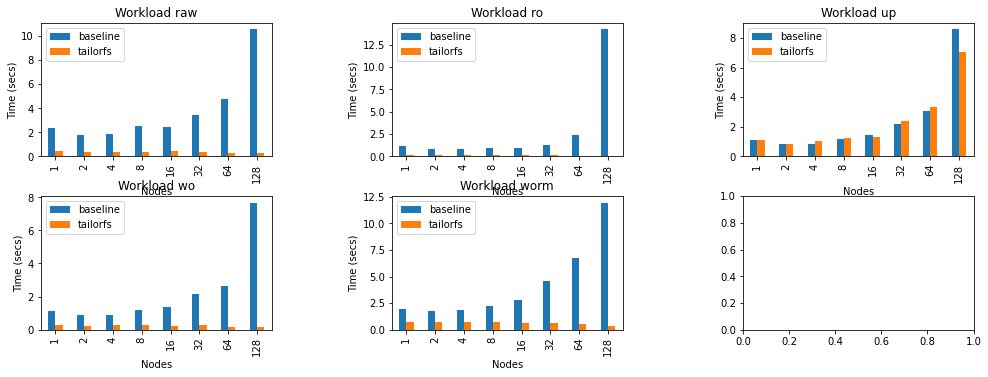

In [497]:
import matplotlib.pyplot as plt
import math
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
for index,workload in enumerate(workloads):
    col = index % ncols
    row = math.floor(index / ncols)
    ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[0])].plot.bar(ax=axes[row,col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload}",figsize=(15, 5))
    ax.set_xlabel("Nodes")
    ax.set_ylabel("Time (secs)")
    

In [498]:
final_df.loc[(slice(None), ["worm"],slice(None), slice(None),slice(None),[1])]

,,,,,,nodes,tailorfs,baseline,improvement
nodes,workload,storage,access_pattern,file_sharing,process_grouping,,,,
1,worm,1,0,0,1,1,0.369786,0.963517,2.605607
2,worm,1,0,0,1,2,0.664710,2.346577,3.530227
4,worm,1,0,0,1,4,0.662996,1.942436,2.929785
8,worm,1,0,0,1,8,0.696103,2.200832,3.161647
16,worm,1,0,0,1,16,0.633358,2.097430,3.311603
32,worm,1,0,0,1,32,0.649184,2.629682,4.050750
64,worm,1,0,0,1,64,0.586813,6.519276,11.109631
128,worm,1,0,0,1,128,0.487418,10.487514,21.516468


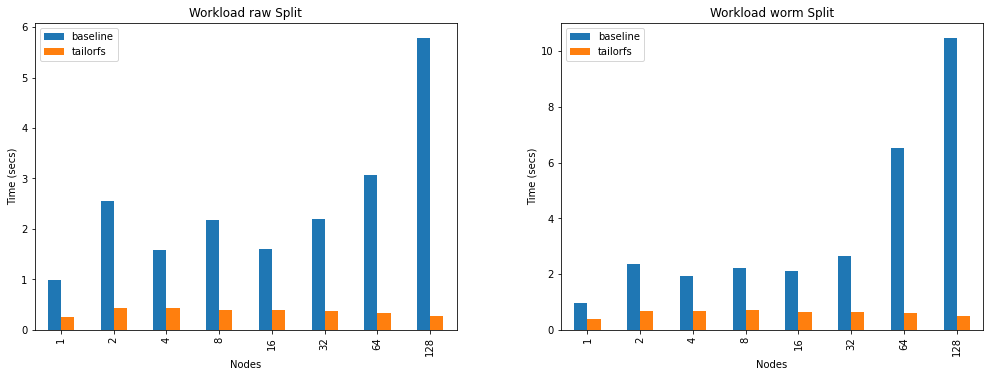

In [499]:
import matplotlib.pyplot as plt
import math
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
index = 0
for workload in workloads:
    if workload == "raw" or workload == "worm":
        col = index % ncols
        row = math.floor(index / ncols)
        ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[1])].plot.bar(ax=axes[col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload} Split",figsize=(15, 5))
        ax.set_xlabel("Nodes")
        ax.set_ylabel("Time (secs)")
        index = index + 1
    

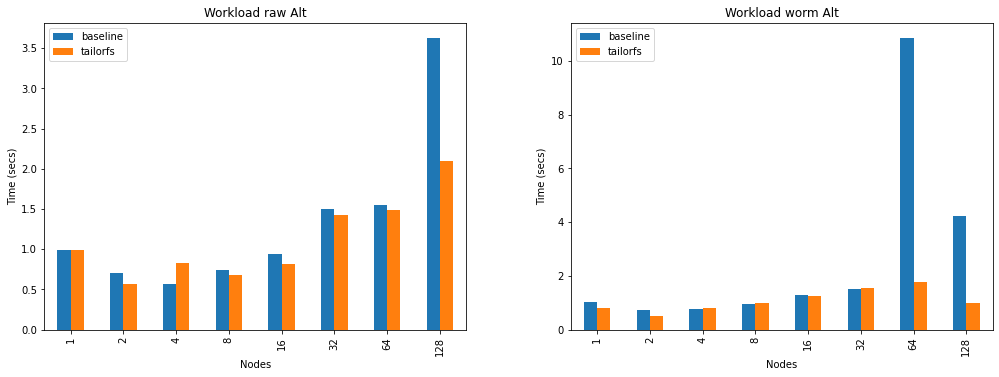

In [294]:
import matplotlib.pyplot as plt
import math
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.tight_layout()
index = 0
for workload in workloads:
    if workload == "raw" or workload == "worm":
        col = index % ncols
        row = math.floor(index / ncols)
        ax = final_df.loc[(slice(None), [workload],slice(None), slice(None),slice(None),[2])].plot.bar(ax=axes[col],x='nodes', y=['baseline','tailorfs'], title=f"Workload {workload} Alt",figsize=(15, 5))
        ax.set_xlabel("Nodes")
        ax.set_ylabel("Time (secs)")
        index = index + 1
    